In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
labor = pd.read_csv("labor-market-Feb2021.csv",skiprows = 13, skipfooter = 3)

/var/folders/hh/nxh3r3vn2jx97bs11v7tsmd40000gn/T/ipykernel_13413/1099751398.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  labor = pd.read_csv("labor-market-Feb2021.csv",skiprows = 13, skipfooter = 3)


In [4]:
labor

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,"40,000","65,000",20.8
1,Animal and Plant Sciences,2.6,58.6,"37,000","63,000",35.1
2,Environmental Studies,3.9,53.7,"39,000","65,000",30.5
3,Architecture,2.2,27.9,"50,000","76,000",41.0
4,Ethnic Studies,5.1,51.9,"40,000","67,000",48.6
...,...,...,...,...,...,...
68,Finance,3.4,34.3,"56,000","93,000",30.9
69,International Affairs,4.1,53.1,"46,150","79,000",43.0
70,History,5.5,53.6,"40,000","64,000",49.5
71,Engineering Technologies,3.1,45.7,"50,000","85,000",24.9


In [5]:
labor.columns = ["major","unemployment","underemployment","early","mid","graduate"]

In [6]:
labor["early"] = labor["early"].str.replace(",","").astype(float)
labor["mid"] = labor["mid"].str.replace(",","").astype(float)

In [7]:
labor

,major,unemployment,underemployment,early,mid,graduate
0,Agriculture,3.0,60.3,40000.0,65000.0,20.8
1,Animal and Plant Sciences,2.6,58.6,37000.0,63000.0,35.1
2,Environmental Studies,3.9,53.7,39000.0,65000.0,30.5
3,Architecture,2.2,27.9,50000.0,76000.0,41.0
4,Ethnic Studies,5.1,51.9,40000.0,67000.0,48.6
...,...,...,...,...,...,...
68,Finance,3.4,34.3,56000.0,93000.0,30.9
69,International Affairs,4.1,53.1,46150.0,79000.0,43.0
70,History,5.5,53.6,40000.0,64000.0,49.5
71,Engineering Technologies,3.1,45.7,50000.0,85000.0,24.9


<Axes: xlabel='early', ylabel='mid'>

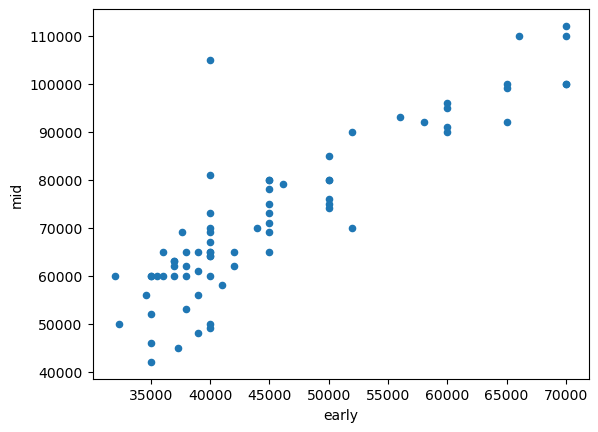

In [8]:
labor.plot.scatter(x = "early", y="mid")

In [9]:
lm = smf.ols(formula = 'mid ~ early', data = labor).fit()

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mid   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     240.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.66e-24
Time:                        13:13:50   Log-Likelihood:                -760.09
No. Observations:                  73   AIC:                             1524.
Df Residuals:                      71   BIC:                             1529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7261.1732   4283.986      1.695      0.094   -1280.853    1.58e+04
early          1.4305      0.092     15.515      0.000       1.247       1.614
==============================================================================
Omnibus:                       37.985   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.673
Skew:                           1.368   Prob(JB):                     2.15e-40
Kurtosis:                      10.250   Cond. No.                     2.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
lm.params

Intercept    7261.173174
early           1.430517
dtype: float64

<Axes: xlabel='early', ylabel='mid'>

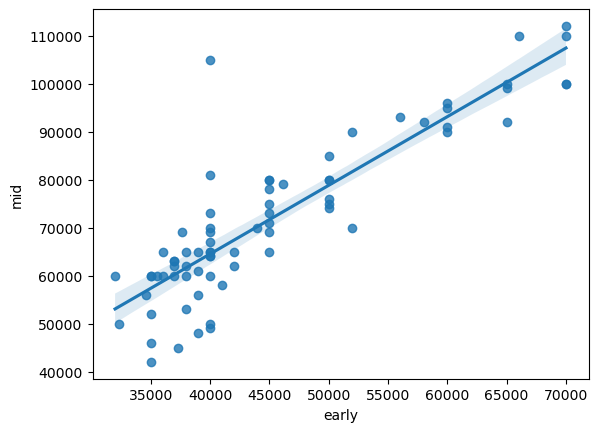

In [12]:
sns.regplot(x = "early", y = "mid", data = labor)

In [13]:
lm.resid

0      518.129603
1     2809.681895
2     1948.647034
3    -2787.044702
4     2518.129603
         ...     
68    5629.850714
69    5720.447405
70    -481.870397
71    6212.955298
72    8365.542450
Length: 73, dtype: float64

<Axes: >

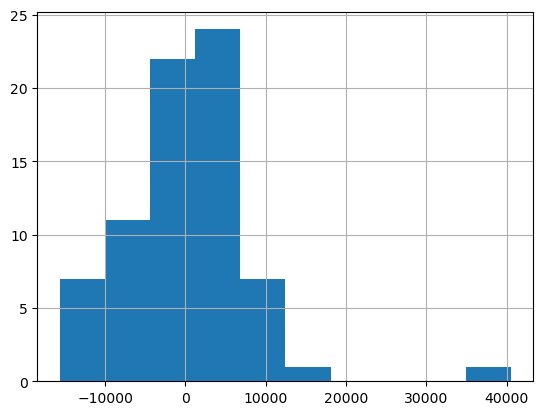

In [14]:
lm.resid.hist()

In [147]:
 lm.resid.idxmax()

61

In [149]:
labor.loc[61]

major              Pharmacy
unemployment            4.2
underemployment        28.3
early               40000.0
mid                105000.0
graduate               62.1
Name: 61, dtype: object